In [20]:
#!pip install qiskit_aer==0.17.0

# Introduction à Qiskit

In [21]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.add_control import control
from qiskit.circuit.library import RZGate, HGate, CRZGate, RYGate
import numpy as np
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Circuits quantiques

Dans Qiskit, les circuits quantiques sont créés à l’aide de l’objet ```QuantumCircuit```. Lors de l’instanciation d’un ```QuantumCircuit```, vous devez spécifier le nombre de qubits de votre circuit.

Vous pouvez visualiser un circuit à tout moment avec la méthode ```draw()``` method. Par défaut, les circuits sont dessinés en ASCII, mais en passant l’argument ```'mpl'``` vous obtenez un dessin via ```matplotlib```, généralement plus lisible.


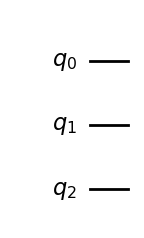

In [22]:
num_qubits = 3

# Créer un circuit quantique
qc = QuantumCircuit(num_qubits)

# Afficher le circuit
qc.draw("mpl")

De plus, on peut instancier un circuit en passant plus registres quantiques et classiques. Les registres classiques servent à enregistrer l'information de mesure. 

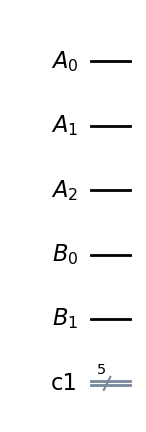

In [23]:
# Créer plusieurs registres quantiques
qreg_1 = QuantumRegister(size=3, name="A")
qreg_2 = QuantumRegister(size=2, name="B")
# Créer un registre classique
creg = ClassicalRegister(size=5)

# Utiliser les registres pour créer un circuit quantique
qc = QuantumCircuit(qreg_1, qreg_2, creg)

# Afficher le circuit quantique
qc.draw("mpl")

## Portes quantiques

### Portes à 1 qubit

Toute opération qui peut être effectuée sur un circuit quantique dans Qiskit est représentée par une ``Instruction``, et les portes unitaires quantiques sont une sous-classe de la classe ``Instruction`` appelée ``Gate``. Pour les portes les plus courantes, ``QuantumCircuit`` a une méthode qui applique la porte directement au(x) qubit(s) passé(s) en argument. Pour les portes de rotation, un angle de rotation doit également être spécifié.  Naturellement, l'ordre dans lequel les portes sont ajoutées au circuit détermine celui dans lequel elles seront appliquées à l'état quantique.

Il peut être pratique d'instancier une ``porte`` directement, auquel cas elle peut être ajoutée au circuit en utilisant la méthode ``append()``.

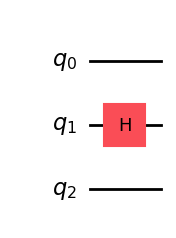

In [24]:
# Créer un circuit quantique
qc = QuantumCircuit(num_qubits)

# Ajouter une porte H au deuxième qubit du circuit
qc.h(1)

# Afficher le circuit
qc.draw("mpl")

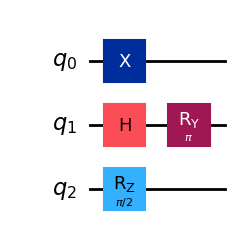

In [25]:
# Ajouter des portes au circuit
# Porte X sur le deuxième qubit
qc.x(0)
# Rotation sur l'axe Y de PI (qubit 1)
qc.ry(np.pi, 1)

# Instancier un objet Gate et l'ajouter au qubit 2. L'argument des indices de qubit(s) doit être un itérable
rz = RZGate(np.pi / 2)
qc.append(rz, [2])
# Afficher le circuit
qc.draw("mpl")

### Portes contrôlées
Tout comme les portes à 1 qubit, les portes à plusieurs qubits ont leurs méthodes associées. Dans ce cas, il est également nécessaire de passer les indices du ou des qubits de contrôle en tant qu'argument. 

En général, toute ``Porte`` de $m$ qubits peut être transformée en son équivalent contrôlé en utilisant la méthode ``control()`` (elle peut être contrôlée par n'importe quel nombre de $n$ qubits et par n'importe quel état de base dans la base de calcul). Lors de l'ajout d'une porte contrôlée à un circuit quantique, une liste de qubits doit être spécifiée, où les premiers $n$ sont les qubits de contrôle, et les derniers $m$ sont activés.

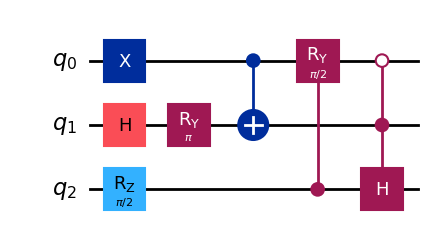

In [26]:
# Ajouter des portes contrôlées au circuit
# CNOT contrôlé par le qubit 0, avec le qubit 1 comme cible
qc.cx(0, 1)
# Rotation sur Y de pi/2 sur le qubit 0 (cible), contrôlée par le qubit 3
qc.cry(np.pi / 2, 2, 0)

# Créer une porte de Hadamard multicontrôlée, contrôlée par l'état |10> sur les qubits 0 et 1, et appliquée sur le qubit 2.
mch = HGate().control(2, ctrl_state="10")
qc.append(mch, range(3))
qc.draw("mpl")

## Mesure d'un circuit 

Pour mesurer un circuit, une instance quantique doit être spécifiée. Les détails de l'exécution des circuits sur des simulateurs ou des appareils réels seront étudiés mardi matin. 

Pour l'instant, nous utilisons un simulateur quantique très simple utilisant la bibliothèque Qiskit Aer. 

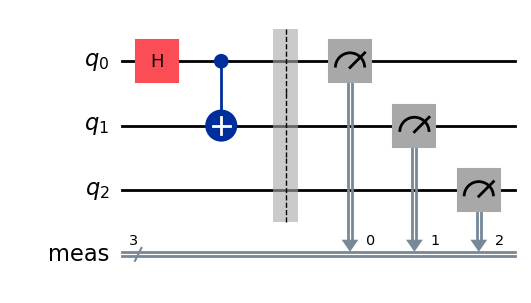

In [27]:
# Créer un circuit quantique
qc = QuantumCircuit(num_qubits)

# Ajouter une porte H au premier qubit du circuit
qc.h(0)
# Ajouter CNOT contrôlé par le qubit 0, avec le qubit 1 comme cible
qc.cx(0, 1)

# Mesurer les qubits
qc.measure_all()

# Afficher le circuit
qc.draw("mpl")

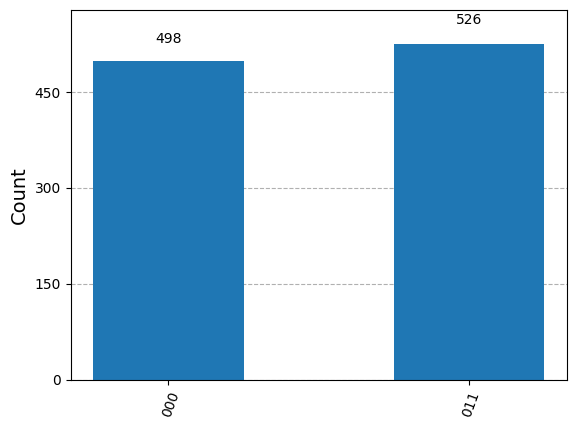

In [28]:
# Instanciation d'un simulateur quantique simple à partir de la bibliothèque Aer
simulator = AerSimulator()

# Faire fonctionner le circuit
result = simulator.run(qc).result()
counts = result.get_counts(qc)
# Tracer le résultat
plot_histogram(counts)

### Exercices

En utilisant les outils présentés jusqu'à présent, construisez et dessinez les circuits suivants :

#### 1.

 ![circuit1](./images/circuit_1.png)

 Notez que les deux portes à deux qubits dans ce circuit sont une porte $Z$ contrôlée et une SWAP, respectivement

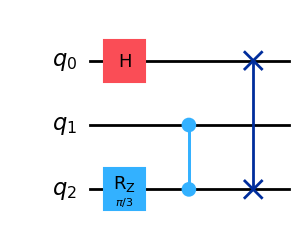

In [52]:
question_1 = QuantumCircuit(3)
question_1.h(0)
rz = RZGate(np.pi / 3)
question_1.append(rz, [2])
question_1.cz(1,2)
question_1.swap(2,0)
question_1.draw("mpl")

#### 2. 

 ![circuit1](./images/circuit_2.png)

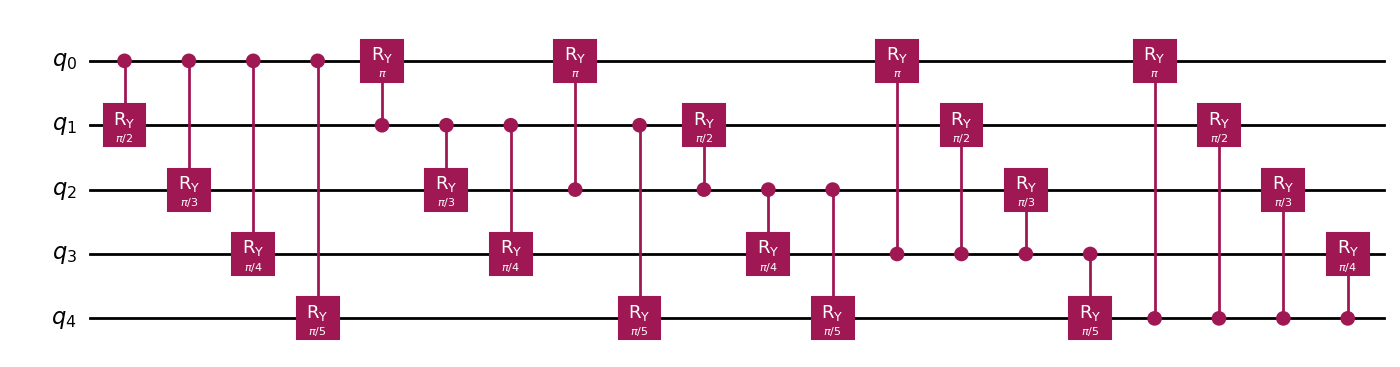

In [61]:
from qiskit.circuit.library import CRYGate

q2 = QuantumCircuit(5)
def create_cry(angle):
    return CRYGate(np.pi/angle)

q2.append(create_cry(2), [0, 1])
q2.append(create_cry(3), [0, 2])
q2.append(create_cry(4), [0, 3])
q2.append(create_cry(5), [0, 4])
q2.append(create_cry(1), [1, 0])
q2.append(create_cry(3), [1,2])
q2.append(create_cry(4), [1, 3])
q2.append(create_cry(1), [2, 0])
q2.append(create_cry(5), [1, 4])
q2.append(create_cry(2), [2, 1])
q2.append(create_cry(4), [2, 3])
q2.append(create_cry(5), [2, 4])
q2.append(create_cry(1), [3,0])
q2.append(create_cry(2), [3, 1])
q2.append(create_cry(3), [3, 2])
q2.append(create_cry(5), [3,4])
q2.append(create_cry(1), [4, 0])
q2.append(create_cry(2), [4, 1])  # π/3
q2.append(create_cry(3), [4, 2])  # π/4
q2.append(create_cry(4), [4,3])
# Affichage du circuit
q2.draw("mpl")

#### 3. 

 ![circuit1](./images/circuit_3.png)

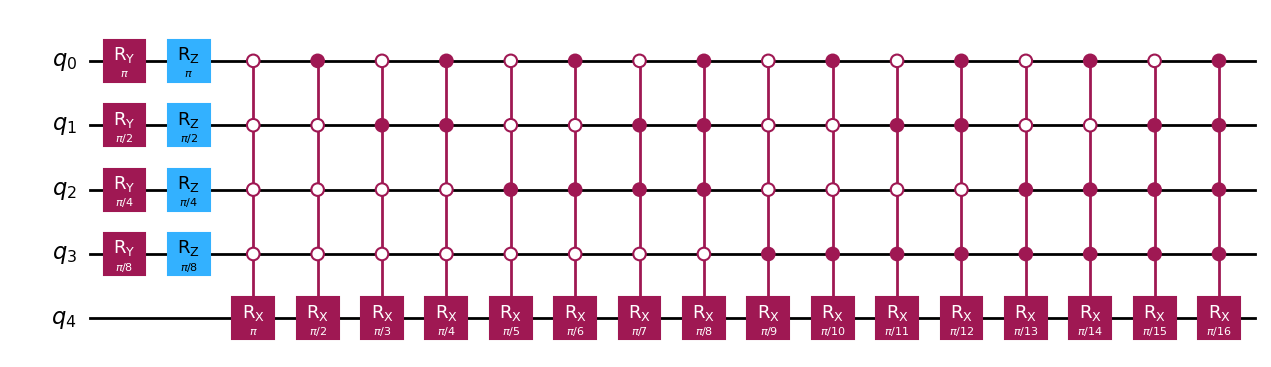

In [75]:
from qiskit.circuit.library import RXGate


def create_ry(angle):
    return RYGate(np.pi/angle)
def create_rz(angle):
    return RZGate(np.pi/angle)
q3 = QuantumCircuit(5)
for i in range(4):
    p = 2**i
    q3.ry(np.pi/p, i)
    q3.append(create_rz(2**i), [i])

for k in range(1, 17):
    ctrl_state = format(k - 1, "04b")  # de 0000 à 1111
    controlled_gate = RXGate(np.pi / k).control(4, ctrl_state=ctrl_state)
    q3.append(controlled_gate, [0, 1, 2, 3, 4])  # les 4 contrôles + cible q4

q3.draw("mpl")


# Circuit de téléportation

Sur la base de la présentation, construisez le circuit de téléportation

C:\Users\user\AppData\Local\Temp\ipykernel_24284\2836364805.py:17: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  q4.x(q[0]).c_if(m1, 1)
C:\Users\user\AppData\Local\Temp\ipykernel_24284\2836364805.py:18: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  q4.z(q[0]).c_if(a1, 1)


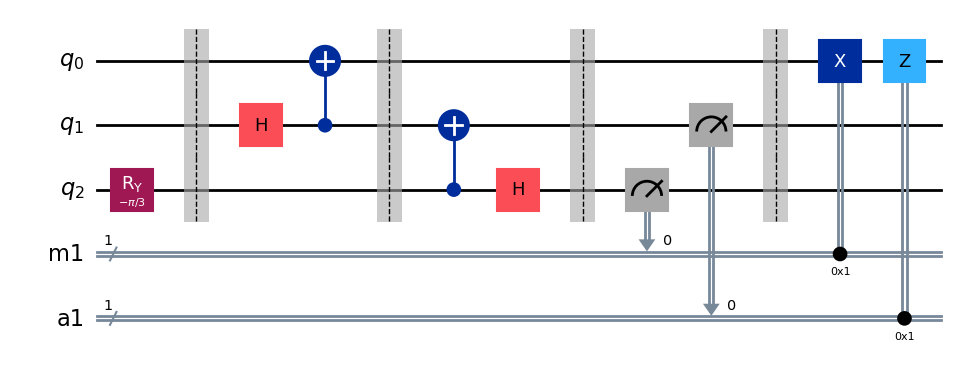

In [95]:
q = QuantumRegister(3, name="q")
m1 = ClassicalRegister(1, name="m1")
a1 = ClassicalRegister(1, name="a1")
q4 = QuantumCircuit(q, m1, a1)

q4.ry(-np.pi/3, q[2])
q4.barrier()
q4.h(q[1])
q4.cx(q[1], q[0])
q4.barrier()
q4.cx(q[2], q[1])
q4.h(q[2])
q4.barrier()
q4.measure(q[2], m1[0])
q4.measure(q[1], a1[0])
q4.barrier()
q4.x(q[0]).c_if(m1, 1)
q4.z(q[0]).c_if(a1, 1)

q4.draw("mpl")